<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-2/blob/main/Homework_2_Problem_2(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

# Problem 2(a)

# Ahmed Elshazly

# 801420724

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()
housing.shape
housing.isnull().sum()*100/housing.shape[0]



,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [18]:
mainroad=housing.pop('mainroad')
guestroom=housing.pop('guestroom')
basement=housing.pop('basement')
hotwaterheatingd=housing.pop('hotwaterheating')
airconditioning=housing.pop('airconditioning')
prefarea=housing.pop('prefarea')
furnishingstatus=housing.pop('furnishingstatus')
housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [19]:

scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing[num_vars] = scaler.fit_transform(housing[num_vars])


In [20]:
np.random.seed(0)
df_train, df_validate = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
y_validate=df_validate.pop('price')

x_train=df_train
x_validate=df_validate
x_train.head()

,area,bedrooms,bathrooms,stories,parking
22,0.439863,0.4,0.000000,0.000000,0.333333
41,0.323711,0.4,0.333333,1.000000,0.000000
91,0.350515,0.2,0.000000,0.000000,0.666667
118,0.327835,0.4,0.000000,0.000000,0.000000
472,0.136082,0.6,0.000000,0.333333,1.000000


In [21]:
X_train1=x_train.values[:,0]
X_train2=x_train.values[:,1]
X_train3=x_train.values[:,2]
X_train4=x_train.values[:,3]
X_train5=x_train.values[:,4]
train_length=len(X_train1)

print('train length= ',train_length)
X_train_0 = np.ones((train_length, 1))

X_t_1=X_train1.reshape(train_length,1)
X_t_2=X_train2.reshape(train_length,1)
X_t_3=X_train3.reshape(train_length,1)
X_t_4=X_train4.reshape(train_length,1)
X_t_5=X_train5.reshape(train_length,1)
y_t=(y_train.values)
X_for_train = np.hstack((X_train_0, X_t_1 , X_t_2 , X_t_3, X_t_4, X_t_5 ))

X_validate1=x_validate.values[:,0]
X_validate2=x_validate.values[:,1]
X_validate3=x_validate.values[:,2]
X_validate4=x_validate.values[:,3]
X_validate5=x_validate.values[:,4]
validate_length=len(X_validate1)
X_validate_0 = np.ones((validate_length, 1))
print('validate length= ',validate_length)


X_V_1=X_validate1.reshape(validate_length,1)
X_V_2=X_validate2.reshape(validate_length,1)
X_V_3=X_validate3.reshape(validate_length,1)
X_V_4=X_validate4.reshape(validate_length,1)
X_V_5=X_validate5.reshape(validate_length,1)
y_v=(y_validate.values)

X_for_validate= np.hstack((X_validate_0, X_V_1 , X_V_2 , X_V_3,  X_V_4, X_V_5 ))


train length=  436
validate length=  109


In [22]:

def compute_cost(X, y, theta,l):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * l) * np.sum(sqrErrors)
    return J

In [23]:
def gradient_descent(X_for_train, y_t, X_for_validate, y_v, theta, alpha, iterations):

    m = len(y_t)  # Number of training examples
    n= len(y_validate) # Number of validation examples
    train_cost_history = np.zeros(iterations)
    validate_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_for_train.dot(theta)
        errors = np.subtract(predictions, y_t)
        sum_delta = (alpha / m) * X_for_train.transpose().dot(errors)
        #print('length of theta =',len(theta))
        #print('length of sum delta=', len(sum_delta))
        #print('iteration=',i)
        #print(theta)
        #print(sum_delta)
        theta =theta - sum_delta

        train_cost_history[i] = compute_cost(X_for_train, y_t, theta,m)
        validate_cost_history[i] = compute_cost(X_for_validate, y_v, theta,n)


    return theta, train_cost_history,validate_cost_history

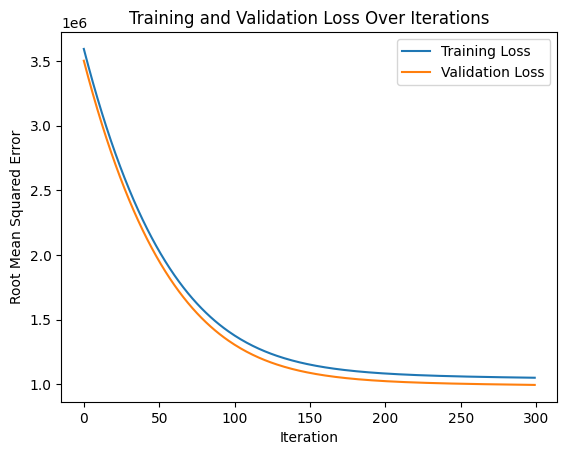

In [24]:
#theta = np.zeros((6,1))
theta = [0., 0., 0., 0., 0., 0.]
iterations = 300
alpha = 0.01
theta, train_cost_history, validate_cost_history = gradient_descent(X_for_train,y_t,X_for_validate,y_v, theta, alpha, iterations)
train_cost_history=np.sqrt(train_cost_history)
validate_cost_history=np.sqrt(validate_cost_history)
#print('Final value of theta =', theta)
#print('train RMSE_history =', train_cost_history)
#print('validate RMSE_history =', validate_cost_history)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_cost_history, label="Training Loss")
plt.plot(validate_cost_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()
housing.shape
housing.isnull().sum()*100/housing.shape[0]



,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [26]:
mainroad=housing.pop('mainroad')
guestroom=housing.pop('guestroom')
basement=housing.pop('basement')
hotwaterheatingd=housing.pop('hotwaterheating')
airconditioning=housing.pop('airconditioning')
prefarea=housing.pop('prefarea')
furnishingstatus=housing.pop('furnishingstatus')
housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [27]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing[num_vars] = stander.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692


In [28]:
np.random.seed(0)
df_train, df_validate = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
y_validate=df_validate.pop('price')

x_train=df_train
x_validate=df_validate
x_train.head()

,area,bedrooms,bathrooms,stories,parking
22,1.337297,0.047278,-0.570187,-0.929397,0.355976
41,0.557830,0.047278,1.421812,2.532024,-0.805741
91,0.737707,-1.308863,-0.570187,-0.929397,1.517692
118,0.585503,0.047278,-0.570187,-0.929397,-0.805741
472,-0.701308,1.403419,-0.570187,0.224410,2.679409


In [29]:
X_train1=x_train.values[:,0]
X_train2=x_train.values[:,1]
X_train3=x_train.values[:,2]
X_train4=x_train.values[:,3]
X_train5=x_train.values[:,4]
train_length=len(X_train1)

print('train length= ',train_length)
X_train_0 = np.ones((train_length, 1))

X_t_1=X_train1.reshape(train_length,1)
X_t_2=X_train2.reshape(train_length,1)
X_t_3=X_train3.reshape(train_length,1)
X_t_4=X_train4.reshape(train_length,1)
X_t_5=X_train5.reshape(train_length,1)
y_t=(y_train.values)
X_for_train = np.hstack((X_train_0, X_t_1 , X_t_2 , X_t_3, X_t_4, X_t_5 ))

X_validate1=x_validate.values[:,0]
X_validate2=x_validate.values[:,1]
X_validate3=x_validate.values[:,2]
X_validate4=x_validate.values[:,3]
X_validate5=x_validate.values[:,4]
validate_length=len(X_validate1)
X_validate_0 = np.ones((validate_length, 1))
print('validate length= ',validate_length)


X_V_1=X_validate1.reshape(validate_length,1)
X_V_2=X_validate2.reshape(validate_length,1)
X_V_3=X_validate3.reshape(validate_length,1)
X_V_4=X_validate4.reshape(validate_length,1)
X_V_5=X_validate5.reshape(validate_length,1)
y_v=(y_validate.values)

X_for_validate= np.hstack((X_validate_0, X_V_1 , X_V_2 , X_V_3,  X_V_4, X_V_5 ))


train length=  436
validate length=  109


In [30]:

def compute_cost(X, y, theta,l):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * l) * np.sum(sqrErrors)
    return J

In [31]:
def gradient_descent(X_for_train, y_t, X_for_validate, y_v, theta, alpha, iterations):

    m = len(y_t)  # Number of training examples
    n= len(y_validate) # Number of validation examples
    train_cost_history = np.zeros(iterations)
    validate_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_for_train.dot(theta)
        errors = np.subtract(predictions, y_t)
        sum_delta = (alpha / m) * X_for_train.transpose().dot(errors)
        #print('length of theta =',len(theta))
        #print('length of sum delta=', len(sum_delta))
        #print('iteration=',i)
        #print(theta)
        #print(sum_delta)
        theta =theta - sum_delta

        train_cost_history[i] = compute_cost(X_for_train, y_t, theta,m)
        validate_cost_history[i] = compute_cost(X_for_validate, y_v, theta,n)


    return theta, train_cost_history,validate_cost_history

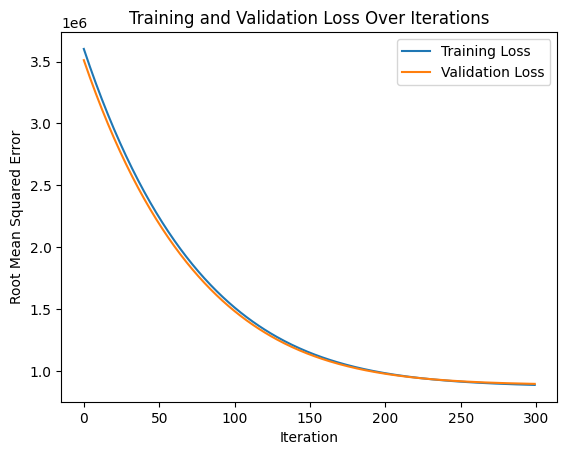

In [32]:
#theta = np.zeros((6,1))
theta = [0., 0., 0., 0., 0., 0.]
iterations = 300
alpha = 0.01

theta, train_cost_history, validate_cost_history = gradient_descent(X_for_train,y_t,X_for_validate,y_v, theta, alpha, iterations)
train_cost_history=np.sqrt(train_cost_history)
validate_cost_history=np.sqrt(validate_cost_history)
#print('Final value of theta =', theta)
#print('train RMSE_history =', train_cost_history)
#print('validate RMSE_history =', validate_cost_history)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_cost_history, label="Training Loss")
plt.plot(validate_cost_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

